# Combining and Transforming Data

## Writing Functions to Transform Our Data

### Rounding GDP to nearest million

#### Create a function for doing the rounding

In [665]:
def roundToMillions (value):
  result = round(value / 1000000)
  return result

#### Now we test our function

All these tests should return `True`.

In [666]:
print(roundToMillions(4567890.1) == 5) # does it round up
print(roundToMillions(0) == 0) # can it handle 0
print(roundToMillions(-1) == 0) # negative numbers
print(roundToMillions(1499999) == 1) # test rounding to the nearest 

True
True
True
True


### Convert to local currency

You need to find the exchange rate for the relevant year. Theres a function for doing the conversion and some tests that should all be `True`.

In [667]:
def usdToGbp (usd):
  return usd / 1.564768 # average rate during 2013

print(usdToGbp(0) == 0)
print(usdToGbp(1.564768) == 1)
print(usdToGbp(-1) < 0)

True
True
True


## Expand abbreviated country names

Expand UK and USA, otherwise return as is.

In [668]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    return name

## Applying Functions

Load in some mock data

In [669]:
import pandas as pd
df = pd.read_csv('./mock_data_gdp.csv')

In [670]:
df.head()

,Country,GPD ($m)
0,UK,5340985343893
1,USA,9345098345098
2,India,6423987234987
3,France,7234098234098


Apply one of the functions to a column and set output to the column.

In [671]:
df['Country'] = df['Country'].apply(expandCountry)
df.head()

,Country,GPD ($m)
0,United Kingdom,5340985343893
1,United States,9345098345098
2,India,6423987234987
3,France,7234098234098


Apply two function one after the other and set result to a new column.

In [672]:
column = df['GPD ($m)']
result = column.apply(usdToGbp).apply(roundToMillions)
df['GPD (£m)'] = result
df.head()

,Country,GPD ($m),GPD (£m)
0,United Kingdom,5340985343893,3413276
1,United States,9345098345098,5972194
2,India,6423987234987,4105393
3,France,7234098234098,4623112


We can then remove the column we don't need anymore.

In [673]:
df = df[['Country', 'GPD (£m)']]
df.head()

,Country,GPD (£m)
0,United Kingdom,3413276
1,United States,5972194
2,India,4105393
3,France,4623112


## Joining: Left, Right and Center

In [674]:
life_df = pd.read_csv('./mock_data_life.csv')
life_df.head()

,Country,Life expectancy (years)
0,United States,79
1,India,66
2,United Kingdom,81
3,Spain,82


### Merge Tables

Two tables can be joined using the `merge()` function if they have a common column with a common name. This will create a new table with columns from both originals but won't duplicate the common column we used to merge on.

In [675]:
gdp_df = df
pd.merge(gdp_df, life_df, on='Country', how='left')

,Country,GPD (£m),Life expectancy (years)
0,United Kingdom,3413276,81.0
1,United States,5972194,79.0
2,India,4105393,66.0
3,France,4623112,NaN


### Different types of joins

There are four possible ways of joining depending on what rows to include. 

A `left` merge will keep all rows in the left table (first argument passed to `merge`). Rows that aren't in the left table won't be included. If a row is only in the left table, the values in the right table for that row will be set to `NaN` ie. null.

A `right` join will do the opposite to a left join. You just set `how='right'` to do this.

An `outer` join will include all rows in both tables.

An `inner` join includes only rows common to both tables.

In [676]:
pd.merge(gdp_df, life_df, on='Country', how='right')

,Country,GPD (£m),Life expectancy (years)
0,United States,5972194.0,79
1,India,4105393.0,66
2,United Kingdom,3413276.0,81
3,Spain,NaN,82


In [677]:
pd.merge(gdp_df, life_df, on='Country', how='outer')

,Country,GPD (£m),Life expectancy (years)
0,United Kingdom,3413276.0,81.0
1,United States,5972194.0,79.0
2,India,4105393.0,66.0
3,France,4623112.0,NaN
4,Spain,NaN,82.0


In [678]:
pd.merge(gdp_df, life_df, on='Country', how='inner')

,Country,GPD (£m),Life expectancy (years)
0,United Kingdom,3413276,81
1,United States,5972194,79
2,India,4105393,66


### Constant values

We can name our variables all uppercase if we want them to be constant, they can be overwritten, but it reminds us not to. Its useful to assign column names to variables in case we want to change them later. Without variables, we'd have to change the hardcoded values everywhere they appear.

## World Bank Data

There is a package for downloading data directly from the world bank open data. 

Apperently is deprecated and now `wbdata` is what you use. I tried installing in conda with `conda install -c conda-forge wbdata` and first with `conda install wbdata`, but neither worked. A last resort is to use `pip` to install, but this won't manage dependencies like conda does and can lead to conflicts.

There is some saved data from the world bank that can be downloaded from the openlearn site, I'll use this.

In [679]:
# from pandas.io.wb import download 
# import wbdata

# YEAR = 2013
# GDP_INDICATOR = 'NY.GDP.MKTP.CD'

# data = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)

# data.head()

### Cleaning up data

The data has some rows that aren't individual countries but groups of countries. The rest of the data is the individual countries, we want just those.

In [680]:
gdp = pd.read_csv('./wb_gdp_2013.csv')
life = pd.read_csv('./wb_le_2013.csv')
pop = pd.read_csv('./wb_pop_2013.csv')

# Constants shouldn't be overwritten. Use for column names
COUNTRY = 'country'
YEAR = 'year'
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
POP_INDICATOR = 'SP.POP.TOTL'


In [681]:
gdp.head()

,country,year,NY.GDP.MKTP.CD
0,Arab World,2013,2.827557e+12
1,Caribbean small states,2013,6.928705e+10
2,Central Europe and the Baltics,2013,1.419384e+12
3,East Asia & Pacific (all income levels),2013,2.084673e+13
4,East Asia & Pacific (developing only),2013,1.172940e+13


In [682]:
gdp.tail()

,country,year,NY.GDP.MKTP.CD
243,Virgin Islands (U.S.),2013,NaN
244,West Bank and Gaza,2013,1.247324e+10
245,"Yemen, Rep.",2013,3.595450e+10
246,Zambia,2013,2.682081e+10
247,Zimbabwe,2013,1.349023e+10


#### Slicing rows

Both the following lines of code do the same thing. We'll use this to slice off the rows we don't want. The individual countries start at row 34.

In [683]:
# gdp.head(5).tail(5-2)
gdp[2:5]

# NOTE: gdp[0] won't work you'd have to do gdp[0:1] or .iloc[0]

,country,year,NY.GDP.MKTP.CD
2,Central Europe and the Baltics,2013,1.419384e+12
3,East Asia & Pacific (all income levels),2013,2.084673e+13
4,East Asia & Pacific (developing only),2013,1.172940e+13


In [684]:
gdp = gdp[34:]
gdp.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
37,American Samoa,2013,NaN
38,Andorra,2013,3.249101e+09


### Drop null rows

Drop rows where there are null values for the column we're interested in. This can be done inplace or not.

In [685]:
# gdp = gdp.dropna(subset=['NY.GDP.MKTP.CD'])
# gdp.dropna() # NOTE: this would remove any row containing a null values anywhere
gdp.dropna(subset=[GDP_INDICATOR], inplace=True)
gdp.isna().sum() # Check if any null values remain

country           0
year              0
NY.GDP.MKTP.CD    0
dtype: int64

We don't need the year column.

In [686]:
headings = [COUNTRY, GDP_INDICATOR]
gdp = gdp[headings]
gdp.head(1)

,country,NY.GDP.MKTP.CD
34,Afghanistan,2.045894e+10


### Repeat the cleaning process for the other two tables

In [687]:
life.drop(YEAR, axis=1, inplace=True)
life.dropna(subset=LIFE_INDICATOR, inplace=True)

pop.drop(YEAR, axis=1, inplace=True)
pop.dropna(subset=POP_INDICATOR, inplace=True)

### Joining & Transforming

Merge all three tables

In [688]:
all = pd.merge(gdp, life, on=COUNTRY, how='inner')
all = pd.merge(all, pop, on=COUNTRY, how='inner')
all.head(1)


,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,SP.POP.TOTL
0,Afghanistan,2.045894e+10,60.028268,30682500.0


#### Apply our functions to the appropriate columns.

Create new columns for the computed values. Then drop the original columns. Rename column the remaining original column.

In [689]:
GDP = 'GDP ($m)'
column = all[GDP_INDICATOR]
all[GDP] = column.apply(usdToGbp).apply(roundToMillions)
all.head(1)

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,GDP ($m)
0,Afghanistan,2.045894e+10,60.028268,30682500.0,13075


In [690]:
LIFE = 'Life expectancy (years)'
all[LIFE] = all[LIFE_INDICATOR].apply(round)
all.head(1)

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,GDP ($m),Life expectancy (years)
0,Afghanistan,2.045894e+10,60.028268,30682500.0,13075,60


In [691]:
POP = 'Population'
all.rename(columns={POP_INDICATOR: POP}, inplace=True)
all.head(1)

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,Population,GDP ($m),Life expectancy (years)
0,Afghanistan,2.045894e+10,60.028268,30682500.0,13075,60


In [692]:
all.drop([GDP_INDICATOR, LIFE_INDICATOR], axis=1, inplace=True )
all.head(1)

,country,Population,GDP ($m),Life expectancy (years)
0,Afghanistan,30682500.0,13075,60


## Correlation

To see if life expectancy grows when the GDP increases I will use a statistical measure known as the **Spearman rank correlation coefficient**.

It’s a number between -1 and 1 that describes how well two indicators correlate, in the following sense.

- A value of 1 means that if I rank (sort) the data from smallest to largest value in one indicator, it will also be in ascending order according to the other indicator. In other words, if one indicator grows, so does the other.
- A value of -1 means a perfect inverse rank relation: if I sort the data from smallest to largest according to one indicator, I will see it is sorted from largest to smallest in the other indicator. When one indicator goes up, the other goes down.
- A value of 0 means there is no rank relation between the two indicators.

A positive value smaller than 1 (or a negative value larger than -1) means there is some direct (or inverse) correlation, but it is not systematic across the whole dataset.

The p-value indicates how significant the result is, in a particular technical sense. To say a correlation is statistically significant doesn’t necessarily mean it is important or strong in the real world, but only that there is reasonable statistical evidence that there is some kind of relationship. Typically, the obtained correlation coefficient is considered statistically significant if the p-value is below 0.05.

The pandas module doesn’t calculate complex statistics. There are other modules in the Anaconda distribution for that. In particular, scipy (Scientific Python) has a stats module that provides the spearmanr() function. The function takes as arguments the two columns of data to correlate. Contrary to the functions you’ve seen so far, it returns two values instead of one: the correlation and the p-value. To store both values, simply use a pair of variables, written in parenthesis.

In [694]:
from scipy.stats import spearmanr 

gdpColumn = all[GDP]

lifeColumn = all[LIFE]

(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)

print('The correlation is', correlation)
print('The p-value is:', pValue)

if pValue < 0.05: 
  print('It is statistically significant.') 
else:
  print('It is not statistically significant.')

The correlation is 0.5010232389671027
The p-value is: 3.2614057033600436e-13
It is statistically significant.


In [695]:
gdpColumn = all[GDP]
popColumn = all[POP]

(correlation, pValue) = spearmanr(gdpColumn, popColumn)

print('The correlation is', correlation)
print('The p-value is:', pValue)

if pValue < 0.05: 
  print('It is statistically significant.') 
else:
  print('It is not statistically significant.')

The correlation is 0.708565007995748
The p-value is: 1.1381776704550529e-29
It is statistically significant.


### Scatterplot

A scatter plot or other chart can be useful to see any relationships the previous step missed.

<AxesSubplot:xlabel='GDP ($m)', ylabel='Life expectancy (years)'>

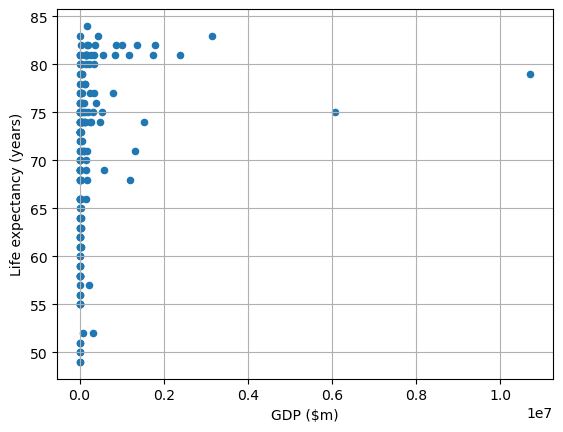

In [697]:
%matplotlib inline

all.plot(x=GDP, y=LIFE, kind='scatter', grid=True)

All the plots are squashed together, this is because the x-axis is too squashed together. We can use a **logarithmic scale** where the axis values don't increase by a constant interval (10, 20, 30, etc) but by a multiplicative factor (10, 100, 1000, etc).

The parameter `logx` has to be set to `True` to use a logarithmic scale on the x-axis. We can also make the chart wider using `figsize`.

You can see its alot easier to see the data.

<AxesSubplot:xlabel='GDP ($m)', ylabel='Life expectancy (years)'>

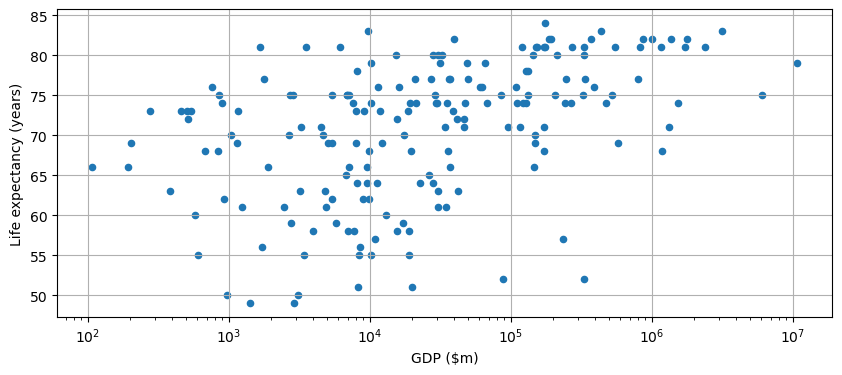

In [698]:
all.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))